# 인공 신경망  
- Forward Propagation : 입력값이 들어오면 여러 개의 은닉층을 순서대로 거쳐 결괏값을 내는 과정
- Back propagation : 결과와 정답 차이로 계산된 손실을 연쇄법칙을 이용하여 입력 단까지 다시 전달하는 과정  

loss.backward() 한 줄이면 각 변수별 기울기를 모두 계산합니다.

## 코드 설명
하나의 x값이 들어가지만 최종적으로 하나의 결과값인 y가 들어온지만 중간에 몇 개의 hidden layer가 들어간다.  
활성화 함수를 거치면서 비선형성이 보장된다  

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1),
                     std = 1)
x = init.uniform_(torch.FloatTensor(num_data ,1),
                  -15, 15)
y = (x ** 2) + 3
y_noise = y + noise

nn.Sequential 클래스는 nn.Linear 과 nn.Relu 같은 모듈들을 순서대로 정렬해놓고  
입력값이 들어오면 이 순서대로 모듈을 실행하여 결괏값을 리턴한다  
인공신경망이 깊이가 깊어질 수록 하나하나 실행하는 것보다 nn.Sequential이 편리해진다

In [14]:
model = nn.Sequential(  nn.Linear(1, 6),
                        nn.ReLU(),
                        nn.Linear(6, 10),
                        nn.ReLU(),
                        nn.Linear(10, 6),
                        nn.ReLU(),
                        nn.Linear(6, 1),
                     )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

In [15]:
loss_array = []

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

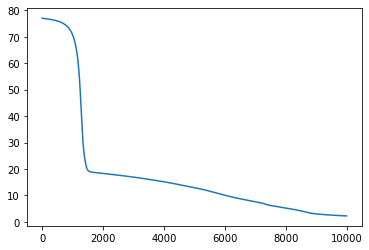

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(loss_array)
plt.show()